<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import math

In [175]:
df = pd.read_csv("https://github.com/reagenhuskey/cs290/raw/main/Diabetes_prediction.csv")

In [176]:
target = "Diagnosis"
attribute = "BMI"

In [177]:
features = df.columns[df.columns != target]
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [178]:
df.nunique()

,0
Pregnancies,8
Glucose,1000
BloodPressure,1000
SkinThickness,1000
Insulin,1000
BMI,1000
DiabetesPedigreeFunction,1000
Age,1000
Diagnosis,2


In [179]:
vals = df[attribute].unique()
vals.sort()
vals

array([13.54881785, 13.88387581, 14.83818512, 15.21643228, 15.32940339,
       15.57253886, 15.78651214, 15.96753526, 16.67690277, 16.98661067,
       17.07271166, 17.22509838, 17.22617063, 17.34181029, 17.57084647,
       17.57636224, 17.6875116 , 17.84820614, 17.93442262, 18.13393838,
       18.14375242, 18.17001383, 18.27670411, 18.35319772, 18.45761194,
       18.47452611, 18.52948423, 18.64615368, 18.65674683, 18.66476222,
       18.72739714, 18.73102741, 18.7898282 , 18.85097819, 18.85370773,
       18.86835034, 18.87781521, 18.89865598, 18.91307638, 18.99916883,
       19.04656703, 19.09055948, 19.10774656, 19.12570988, 19.13443067,
       19.20342762, 19.21645333, 19.25952672, 19.31956617, 19.33467583,
       19.36165485, 19.37524296, 19.40194273, 19.41811912, 19.46427985,
       19.47936635, 19.47992884, 19.49453677, 19.54523072, 19.5939584 ,
       19.61638703, 19.64496482, 19.65131539, 19.65309454, 19.65538687,
       19.66368698, 19.69515088, 19.71510333, 19.73296061, 19.73

In [180]:
props = df[df[attribute] <= vals[400]][target].value_counts(normalize=True)
props


,proportion
Diagnosis,
0,0.670823
1,0.329177


In [181]:
df[target].unique()

array([0, 1])

In [182]:
entropy = 0
for p in props.array:
  entropy = entropy - p*math.log2(p)
entropy

0.9140833658986915

In [183]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props.iloc[i]*math.log2(props.iloc[i])
entropy

0.9140833658986915

In [184]:
entropy = 0
overall = len(df)
for val in vals:
  subset_size = len(df[df[attribute] == val])
  weight = subset_size/overall
  props = df[df[attribute] <= vals[400]][target].value_counts(normalize=True)
  for p in props.array:
    entropy = entropy - weight*(p*math.log2(p))

entropy

0.9140833658986567

**Binary Tree**

In [185]:
import sklearn.metrics as metrics

In [186]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [187]:
train_set.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')

In [188]:
train_set = train_set[["BMI","Glucose","BloodPressure","SkinThickness","Age","Pregnancies", "Diagnosis"]]

In [189]:
test_set = test_set[["BMI","Glucose","BloodPressure","SkinThickness","Age","Pregnancies", "Diagnosis"]]

In [190]:
X_train = train_set[["BMI","Glucose","BloodPressure","SkinThickness","Age","Pregnancies"]]
y_train = train_set["Diagnosis"]

In [191]:
X_test = test_set[["BMI", "Glucose", "BloodPressure", "SkinThickness", "Age", "Pregnancies"]]
y_test = test_set["Diagnosis"]

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [194]:
num_attributes = X_train.select_dtypes( include = ['int64','float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [195]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [196]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [197]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.69375, 0.66875, 0.6875 , 0.65625, 0.70625])

In [198]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age',
       'Pregnancies'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [199]:
predictions = pipeline.predict( X_test )

[Text(0.5, 0.875, 'x[3] <= -1.743\ngini = 0.425\nsamples = 800\nvalue = [555, 245]'),
 Text(0.25, 0.625, 'x[2] <= 1.362\ngini = 0.219\nsamples = 40\nvalue = [35, 5]'),
 Text(0.125, 0.375, 'x[5] <= 1.967\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.0625, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'x[4] <= 0.13\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.625, 'x[3] <= -1.344\ngini = 0.432\nsamples = 760\nvalue = [520, 240]'),
 Text(0.625, 0.375, 'x[4] <= 0.707\ngini = 0.485\nsamples = 29\nvalue = [12, 17]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.6875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.875, 0.375, 'x[4] <= -1.361\ngini = 0.424\nsamples = 731\nvalue = [508, 223]'),
 Text(0

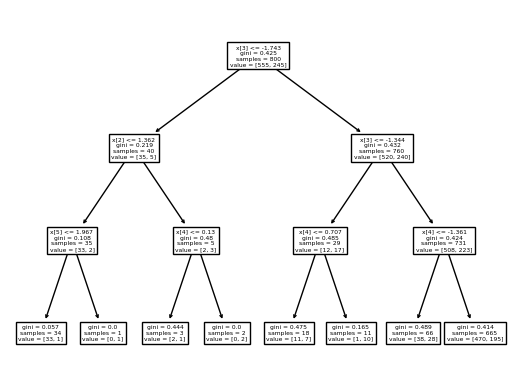

In [201]:
plot_tree( pipeline.named_steps['clf'])